In [1]:
import requests
import pprint
import pandas


In [11]:
class PlayerScraper:
    def __init__(self):
        self.endpoint = "https://v3.football.api-sports.io/players/topscorers"
        self.key = "38f912894585a68ef5819ed617600292"
        self._data = None

    def scrape(self):
        # requesting data from the endpoint
        return requests.get(
            self.endpoint,  # endpoint
            headers={"x-apisports-key": self.key},
            params={"season": 2020,
                    "league":39}
        ).json()
    @property
    def data(self):
        if self._data is None:
            self._data = self.scrape()

        return self._data
    def get_goals_assists_by_player(self):
        resp = self.data["response"]
        df_data = { "name": [], "goals": [], "assists": [], "shots": [], "on": [],
                    "games":[], "duels":[], "won":[], "dribble_percent": [],
                    "fouls drawn per game":[], "penalty win per game": [], "penalty scored per game": []}

        for player_dict in resp:  # for dictionary in list
            player_info = player_dict["player"]
            name = player_info["name"]

            player_stats_list = player_dict["statistics"]
            player_stats = player_stats_list[0]  # number in brackets to get item from a list

            goal_data = player_stats["goals"]
            goals = goal_data["total"]
            assists = goal_data["assists"]

            games_data = player_stats["games"]
            apps = games_data["appearences"]

            shot_data = player_stats["shots"]
            total = shot_data["total"]
            on = shot_data["on"]

            dribble_data = player_stats["dribbles"]
            dribbles_percent = dribble_data["success"]/dribble_data["attempts"] * 100

            targMan_data = player_stats["duels"]
            Tdeuls = targMan_data["total"]
            wonDeuls = targMan_data["won"]

            penaulty_data = player_stats["penalty"]
            won = penaulty_data["won"]
            if won is None: won = 0
            won = won / apps
            scored = penaulty_data["scored"]
            if scored is None: scored = 0
            scored = scored / apps

            foul_data = player_stats["fouls"]
            drawn = foul_data["drawn"]
            if drawn is None: drawn = 0
            drawn = drawn / apps

            if total is None:
                total = 0

            if on is None:
                on = 0

            if assists is None:
                assists = 0

            if apps is None:
                apps = 0

            if Tdeuls is None:
                Tdeuls = 0

            if wonDeuls is None:
                wonDeuls = 0

            df_data["games"].append(apps)
            df_data["shots"].append(total)
            df_data["on"].append(on)
            df_data["name"].append(name)
            df_data["goals"].append(goals)
            df_data["assists"].append(assists)
            df_data["duels"].append(Tdeuls)
            df_data["won"].append(wonDeuls)
            df_data["dribble_percent"].append(dribbles_percent)
            df_data["fouls drawn per game"].append(drawn)
            df_data["penalty win per game"].append(won)
            df_data["penalty scored per game"].append(scored)

        return pandas.DataFrame(df_data)

In [14]:
#!pip install soccerplots

from IPython.display import display
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
#%run scrapers.ipynb
#from scrapers import PlayerScraper

playerstats = PlayerScraper()
df = playerstats.get_goals_assists_by_player()
display(df)

,name,goals,assists,shots,on,games,duels,won,dribble_percent,fouls drawn per game,penalty win per game,penalty scored per game
0,H. Kane,23,14,110,53,35,466,209,52.000000,1.714286,0.0,0.114286
1,Mohamed Salah,22,5,90,52,37,297,94,42.857143,0.594595,0.0,0.162162
2,Bruno Fernandes,18,12,84,51,37,364,147,51.111111,1.405405,0.0,0.243243
3,Son Heung-Min,17,10,53,36,37,357,144,54.166667,1.459459,0.0,0.027027
4,P. Bamford,17,7,90,47,38,279,110,47.500000,0.605263,0.0,0.052632
5,D. Calvert-Lewin,16,0,72,46,33,463,233,44.897959,1.242424,0.0,0.000000
6,J. Vardy,15,9,67,38,34,251,119,63.414634,0.735294,0.0,0.235294
7,O. Watkins,14,5,72,46,37,590,254,56.521739,1.324324,0.0,0.027027
8,İ. Gündoğan,13,2,43,22,28,164,89,69.230769,0.928571,0.0,0.035714
9,A. Lacazette,13,2,40,29,31,282,121,61.111111,1.741935,0.0,0.096774


In [15]:

def extra_columns(df):
    df["goals_per_game"] = df["goals"] / df["games"]
    df["assists_per_game"] = df["assists"] / df["games"]
    df["duels_win_percent"] = df["won"] / df["duels"] * 100

    df.loc[(df["dribble_percent"] > 40) &
           (df["fouls drawn per game"] > 1) &
           (df["penalty scored per game"] > 0.1),
           "player type"] = "dribbler"

    df.loc[(df["duels_win_percent"] > 0.3) &
           (df["goals"] > 10) &
           (df["assists_per_game"] > 0.3) &
           (df["penalty scored per game"] > 0.1),
           "player type"] = "target man"


extra_columns(df)

In [21]:
def plot_radars(df):
    ranks = df.copy()

    target_man_cols = ["duels_win_percent", "goals", "assists_per_game", "penalty scored per game"]
    dribbler_cols = ["dribble_percent", "fouls drawn per game", "penalty scored per game"]
    include = list(set(target_man_cols + dribbler_cols))
    #print(include)

    # add up the rank for each of these columns
    ranks[include] = ranks[include].rank(method="dense", ascending=True)
    factor = len(df) / 10
    ranks[include] = ranks[include] / factor
    targetmen = ranks.loc[ranks["player type"] == "target man", include + ["name"]]
    targetmen["ranksum"] = targetmen[target_man_cols].sum(axis=1)
    dribblers = ranks.loc[ranks["player type"] == "dribbler", include + ["name"]]
    dribblers["ranksum"] = dribblers[dribbler_cols].sum(axis=1)

    targetmen = targetmen.sort_values("ranksum", ascending=False)
    dribblers = dribblers.sort_values("ranksum", ascending=False)

    top_target_man = targetmen.iloc[0]
    top_target_man_name = top_target_man["name"]
    top_target_man_values = top_target_man[include]
    top_dribbler = dribblers.iloc[0]
    top_dribbler_name = top_dribbler["name"]
    top_dribbler_values = top_dribbler[include]
   # print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
   # print(targetmen)

    #print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

    #print(dribblers)
   # print("################################")

    ranges = []
    targetman_value = []
    dribbler_value = []
    for p in include:
        a = min(df[p])
        a = a - (a * .25)

        b = max(df[p])
        b = b + (b * .25)

        # ranges.append((a, b))
        ranges.append((1, 10))

    #print(ranges)

    T = dict(
        title_name=top_target_man_name,
        title_color='blue',
        subtitle_name='top target man',
        subtitle_color='blue',
        title_name_2=top_dribbler_name,
        title_color_2='red',
        subtitle_name_2='top dribbler',
        subtitle_color_2='red'
    )
    S1 = [top_target_man_values.to_list(), top_dribbler_values.to_list()]
    #print(S1)

    plt.rcParams["font.family"] = "Arial"

    # Plotting the data
    radar = Radar(fontfamily="Arial", background_color="black", patch_color="#28252C", label_color="white",
                  range_color="#BFE9BF")
    fig, ax = radar.plot_radar(ranges=ranges, params=include, fontfamily="Arial",
                               values=S1, alphas=[0.76, 0.6],
                               title=T, endnote="Visualisation of Results", radar_color=['#0f4c75', '#e94560'], compare=True)
    plt.show()

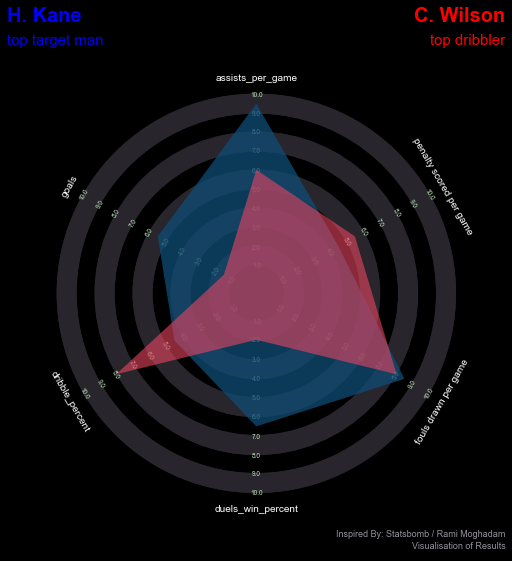

In [22]:
pandas.set_option('display.max_columns', None)
plot_radars(df)

params = ["goals_per_game", "assists_per_game", "duels_win_percent",
          "dribble_percent", "duels_win_percent", "penalty scored per game"]



In [23]:

pandas.set_option('display.max_columns', None)
display(df)

,name,goals,assists,shots,on,games,duels,won,dribble_percent,fouls drawn per game,penalty win per game,penalty scored per game,goals_per_game,assists_per_game,duels_win_percent,player type
0,H. Kane,23,14,110,53,35,466,209,52.000000,1.714286,0.0,0.114286,0.657143,0.400000,44.849785,target man
1,Mohamed Salah,22,5,90,52,37,297,94,42.857143,0.594595,0.0,0.162162,0.594595,0.135135,31.649832,NaN
2,Bruno Fernandes,18,12,84,51,37,364,147,51.111111,1.405405,0.0,0.243243,0.486486,0.324324,40.384615,target man
3,Son Heung-Min,17,10,53,36,37,357,144,54.166667,1.459459,0.0,0.027027,0.459459,0.270270,40.336134,NaN
4,P. Bamford,17,7,90,47,38,279,110,47.500000,0.605263,0.0,0.052632,0.447368,0.184211,39.426523,NaN
5,D. Calvert-Lewin,16,0,72,46,33,463,233,44.897959,1.242424,0.0,0.000000,0.484848,0.000000,50.323974,NaN
6,J. Vardy,15,9,67,38,34,251,119,63.414634,0.735294,0.0,0.235294,0.441176,0.264706,47.410359,NaN
7,O. Watkins,14,5,72,46,37,590,254,56.521739,1.324324,0.0,0.027027,0.378378,0.135135,43.050847,NaN
8,İ. Gündoğan,13,2,43,22,28,164,89,69.230769,0.928571,0.0,0.035714,0.464286,0.071429,54.268293,NaN
9,A. Lacazette,13,2,40,29,31,282,121,61.111111,1.741935,0.0,0.096774,0.419355,0.064516,42.907801,NaN
